**ASSIGNMENT SUBMISSION DEADLINE: 29/08/2019**
- In this exercise, you will learn some basic image transformations by implementing a simplified Guassian Pyramid.
- The functions to be implemented are given in 'transform.py', along with the instructions and grade points for each function. 
- The test image is given in folder /inputs
- Sample outputs in numpy formats are provided in /outputs
- Most of these functions are available in buildin libraries, but you are not allowed to use them in this assignment.
- Apart from the coding, please answer the 3 question sections in this jupyter notebook. Please provide your answers succinctly.

**Attention**:
- Please use python with version = 3.5 (>3.5 should be OK), and install the libs provided in requirements.txt via 'pip install -r requirements.txt'.
- `numpy` is utilized for computation. use default data type, i.e., dtype='np.float64'.
- You do not need a GPU for this assignment. CPU is enough.
- To run this Jupyter notebook, you need to install the dependent libraries as stated in requirements.txt.
- Please run the notebook cell by cell.
- Please do not change the inputs arguments of the functions in py files, otherwise your implementation would fail to pass the test.
- After you implement one function, remember to restart the notebook kernel to help it recognize your fresh code.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.

In [1]:
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

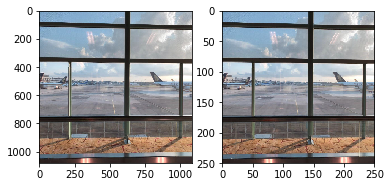

In [2]:
img = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
img_resize = cs4243_resize(img, 9,9)
"""
output:
[[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]]
"""

image = load_image('inputs/airport.jpg')
image_resize = cs4243_resize(image, 250, 250)

plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image_resize)
plt.show()

image_resize_sample_file = 'outputs/image_resize_sample.npy'
#image_resize_sample_file = 'outputs/image_resize_sample_mac_linux.npy'  #uncomment if you are using MacOS ot Linux

# np.save(image_resize_sample_file, image_resize)
image_resize_sample = np.load(image_resize_sample_file)
assert np.max(np.abs(image_resize_sample - image_resize)) < 1e-10, "Your solution is incorrect."

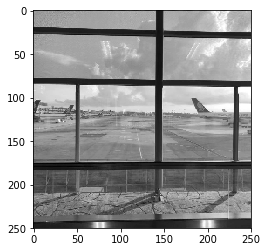

In [3]:
image_resize_sample_file = 'outputs/image_resize_sample.npy'
image_resize_sample = np.load(image_resize_sample_file)

image_grey = cs4243_rgb2grey(image_resize_sample)

plt.imshow(image_grey)
plt.show()

image_grey_sample_file = 'outputs/image_grey_sample.npy'
# np.save(image_grey_sample_file, image_grey)
image_grey_sample = np.load(image_grey_sample_file)
assert np.max(np.abs(image_grey_sample - image_grey)) < 1e-10, "Your solution is incorrect."

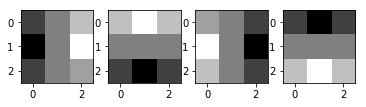

In [4]:
kernel_1 = np.array([[-1,0,1],[-2, 0, 2], [-1, 0, 0.5]])
kernel_2 = np.array([[1,2,1],[0, 0, 0], [-1, -2, -1]])
kernel_3 = cs4243_rotate180(kernel_1)
kernel_4 = cs4243_rotate180(kernel_2)

plt.subplot(141)
plt.imshow(kernel_1)

plt.subplot(142)
plt.imshow(kernel_2)

plt.subplot(143)
plt.imshow(kernel_3)

plt.subplot(144)
plt.imshow(kernel_4)
plt.show()

kernel_rotate_sample_file = 'outputs/kernel_rotate_sample.npy'
# np.save(kernel_rotate_sample_file, kernel_3)
kernel_rotate_sample = np.load(kernel_rotate_sample_file)
assert np.max(np.abs(kernel_rotate_sample - kernel_3)) < 1e-10, "Your solution is incorrect."

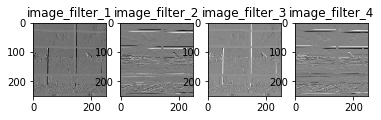

In [5]:
image_filter_1 = cs4243_filter(image_grey_sample, kernel_1)
image_filter_2 = cs4243_filter(image_grey_sample, kernel_2)
image_filter_3 = cs4243_filter(image_grey_sample, kernel_3)
image_filter_4 = cs4243_filter(image_grey_sample, kernel_4)


plt.subplot(141)
plt.imshow(image_filter_1)
plt.title('image_filter_1')

plt.subplot(142)
plt.imshow(image_filter_2)
plt.title('image_filter_2')

plt.subplot(143)
plt.imshow(image_filter_3)
plt.title('image_filter_3')

plt.subplot(144)
plt.imshow(image_filter_4)
plt.title('image_filter_4')

plt.show()

image_filter_sample_file = 'outputs/image_filter_sample.npy'
# np.save(image_filter_sample_file, image_filter_1)
image_filter_sample = np.load(image_filter_sample_file)
assert np.max(np.abs(image_filter_sample - image_filter_1)) < 1e-10, "Your solution is incorrect."

**Question** :
What is the difference between imge_filter_1 and image_filter_2? What kind of image features they can capture?

**Answer**:

imge_filter_1 highlights vertical edges whereas imge_filter_2 highlights horizontal edges.

filter_1 captures vertical edges whereas filter_2 captures horizontal edges.

Same kernel.


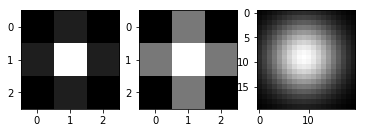

In [6]:
kernel_sig05 = cs4243_guassian_kernel(3, 0.5)
kernel_sig2 = cs4243_guassian_kernel(3, 2)
kernel_ks20_sig5 = cs4243_guassian_kernel(20, 5)

kernel_sig2_rotate = cs4243_rotate180(kernel_sig2)
if np.max(np.abs(kernel_sig2 - kernel_sig2_rotate)) < 1e-10:
    print("Same kernel.")

plt.subplot(131)
plt.imshow(kernel_sig05)

plt.subplot(132)
plt.imshow(kernel_sig2)

plt.subplot(133)
plt.imshow(kernel_ks20_sig5)
plt.show()

guassian_kernel_sample_file = 'outputs/guassian_kernel_sample.npy'
# np.save(guassian_kernel_sample_file, kernel_ks20_sig5)
guassian_kernel_sample = np.load(guassian_kernel_sample_file)
assert np.max(np.abs(guassian_kernel_sample - kernel_ks20_sig5)) < 1e-10, "Your solution is incorrect."

Native 4 nested loop: 1.1343235969543457
Fast version: 0.4337456226348877
Faster version: 0.20887994766235352


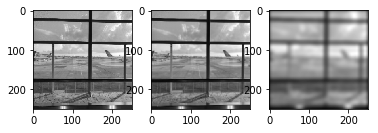

In [7]:
import time

t1 = time.time()
image_filter_sig05 = cs4243_filter(image_grey_sample, kernel_sig05)
t2 = time.time()
image_filter_sig2 = cs4243_filter_fast(image_grey_sample, kernel_sig2)
t3 = time.time()
image_filter_sig2_faster = cs4243_filter_faster(image_grey_sample, kernel_sig2)
t4 = time.time()

image_filter_ks20_sig5 = cs4243_filter_faster(image_grey_sample, kernel_ks20_sig5)


print('Native 4 nested loop: {}'.format(t2-t1))
print('Fast version: {}'.format(t3-t2))
print('Faster version: {}'.format(t4-t3))

plt.subplot(131)
plt.imshow(image_filter_sig05)

plt.subplot(132)
plt.imshow(image_filter_sig2)

plt.subplot(133)
plt.imshow(image_filter_ks20_sig5)
plt.show()

image_filter_fast_sample_file = 'outputs/image_filter_fast_sample.npy'
# np.save(image_filter_fast_sample_file, image_filter_sig2)
image_filter_fast_sample = np.load(image_filter_fast_sample_file)
assert np.max(image_filter_fast_sample - image_filter_sig2) < 1e-10, "Your solution is incorrect."


image_filter_faster_sample_file = 'outputs/image_filter_faster_sample_ks3.npy'
# np.save(image_filter_faster_sample_file, image_filter_sig2_faster)
image_filter_faster_sample = np.load(image_filter_faster_sample_file)
assert np.max(np.abs(image_filter_faster_sample - image_filter_sig2_faster)) < 1e-10, "Your solution is incorrect."

image_filter_faster_sample_file = 'outputs/image_filter_faster_sample.npy'
# np.save(image_filter_faster_sample_file, image_filter_ks20_sig5)
image_filter_faster_sample = np.load(image_filter_faster_sample_file)
assert np.max(np.abs(image_filter_faster_sample - image_filter_ks20_sig5)) < 1e-10, "Your solution is incorrect."

**Questions**:
    Why do we need to rotate the kernel by 180 before doing element-wise multiplication in convolutional operation, is it necessary for Guassian kernel?

**Answer** 

If we do not rotate the kernel by 180 degrees, the pixels in the image would be flipped 180 degrees around the centre of the kernel, which would not give us the proper effects.

It's not necessary for gaussian kernel because gaussian kernels are symmetric.

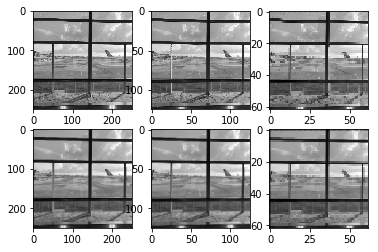

In [8]:
image_ds0 = cs4243_downsample(image_grey_sample, 2)
image_ds1 = cs4243_downsample(image_grey_sample, 4)
image_ds2 = cs4243_downsample(image_filter_sig2, 2)
image_ds4 = cs4243_downsample(image_filter_sig2, 4)

plt.subplot(231)
plt.imshow(image_grey)
plt.subplot(232)
plt.imshow(image_ds0)
plt.subplot(233)
plt.imshow(image_ds1)

plt.subplot(234)
plt.imshow(image_filter_sig2)
plt.subplot(235)
plt.imshow(image_ds2)
plt.subplot(236)
plt.imshow(image_ds4)

image_down_sample_file = 'outputs/image_down_sample.npy'
# np.save(image_down_sample_file, image_ds2)
image_down_sample = np.load(image_down_sample_file)
assert np.max(np.abs(image_down_sample - image_ds2)) < 1e-10, "Your solution is incorrect."

**Question**: 
What are the differences between images down sampled from the original image and the Guassian filtered image? Why do we need to do Guassian filtering before down sample the image?

**Answer**: 

The image downsampled can be distorted in shape, because when the image is sharp and we try to find the nearest neighbor, we can end up copying pixels that are not representative of their surroundings.

Gaussian filtered image produces less distortion in shape when downsampled, because the Gaussian filter smoothens the image. Each pixel becomes more representative of their surroundings after Gaussian filter. Therefore, when we apply nearest neighbor algorithm, we are less likely to end up copying pixels that are "out of place".

In short, Gaussian filter prevents shape distortions when we downsample.